In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
sns.set()

from pylab import rcParams ##matplotlib
rcParams['figure.figsize'] = 12, 8

/root/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/root/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
rootpath = u"/root/venv/data/jupyter/root/"

In [3]:
items = pd.read_csv(rootpath+"ECommAI_ubp_round1_item_feature", delimiter='\t', header=None, names= ["item_id", "class1_id", "class_id", "brand_id", "price"])
gc.collect()

0

In [4]:
feature_names = ["item_id", "class1_id", "class_id", "brand_id", "price"]

In [190]:
items[items["item_id"] == "1139076276"].shape[0]

0

## 1.数据基本信息的查看

In [6]:
items.shape

(10786748, 5)

In [7]:
items.describe()

,item_id,class1_id,class_id,brand_id,price
count,1.078675e+07,1.078675e+07,1.078675e+07,1.078675e+07,1.078675e+07
mean,1.017621e+09,3.359527e+07,5.032353e+07,5.431367e+08,1.287265e+03
std,2.675226e+08,3.887227e+07,3.169591e+07,7.714432e+08,2.218108e+05
min,4.200000e+01,1.100000e+01,1.101000e+03,0.000000e+00,0.000000e+00
25%,9.320271e+08,2.100000e+01,5.000226e+07,8.675765e+06,6.800000e+01
50%,1.134171e+09,5.000684e+07,5.001112e+07,1.226643e+08,1.680000e+02
75%,1.204354e+09,5.001386e+07,5.001578e+07,7.460133e+08,3.780000e+02
max,1.258259e+09,2.011621e+08,2.012277e+08,4.731456e+09,2.650000e+08


In [8]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10786748 entries, 0 to 10786747
Data columns (total 5 columns):
item_id      int64
class1_id    int64
class_id     int64
brand_id     int64
price        float64
dtypes: float64(1), int64(4)
memory usage: 411.5 MB


In [9]:
items.nunique()


item_id      10786748
class1_id         111
class_id         8381
brand_id       197784
price           97564
dtype: int64

In [9]:
items.min()

item_id        42.0
class1_id      11.0
class_id     1101.0
brand_id        0.0
price           0.0
dtype: float64

#### 根据class1_id和class_id的意义，尝试构建class_id_3的特征，即为补全9位class1_id + 9位class_id的构建具体的商品类目特征

In [10]:
items["class_id_0"] = items["class1_id"].astype(str).str.zfill(9) 

In [11]:
items["class_id_1"] = items["class_id"].astype(str).str.zfill(9) 

In [12]:
items["class_id_3"] = items["class_id_0"] + items["class_id_1"]

In [13]:
items["class_id_3"].nunique()

8384

In [14]:
gc.collect()

20

#### 因为class_id_3的数为8384，说明类目特征中主要起作用的还是class_id 

## 2.找出每个特征关于个数的关系

### 2.1 cate_1_id类别的数量分布

Text(0.5, 1.0, 'class1_id')

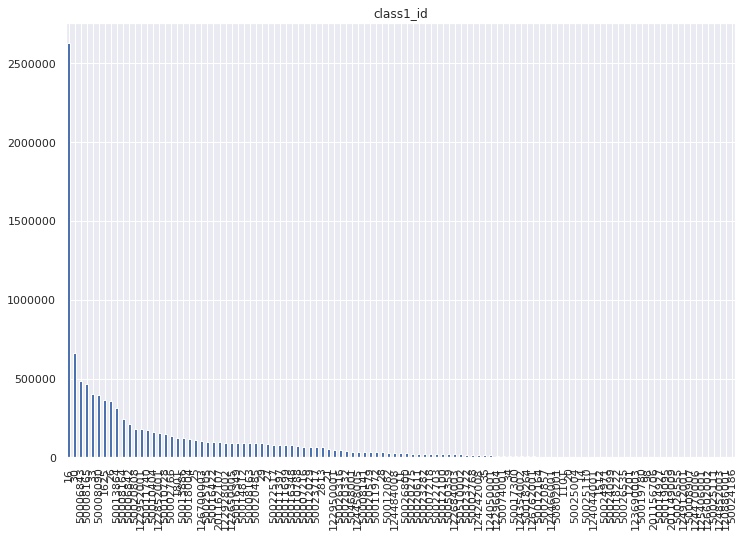

In [4]:
 #"class_id", "brand_id", "price"
items["class1_id"].value_counts().plot(kind='bar')
plt.title("class1_id")


In [20]:
items["class1_id"].value_counts().to_csv(rootpath+'result_cate_1_id.csv', sep='\t', header=None, index=False)


/root/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [17]:
pd.DataFrame(items["class1_id"].value_counts()).to_csv(rootpath+'result_cate1_id.csv')

### 2.2 cate_id类别的数量分布

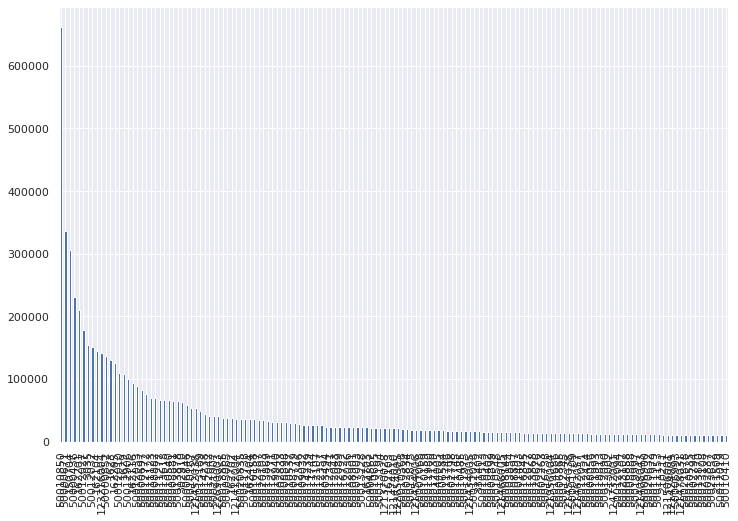

In [28]:
items["class_id"].value_counts()[items["class_id"].value_counts() > 10000].plot(kind='bar')


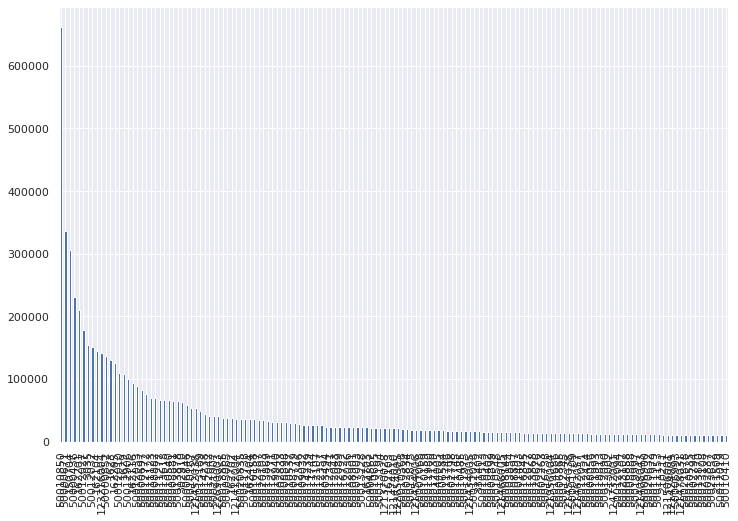

In [36]:
items["class_id"].value_counts()[items["class_id"].value_counts() > 10000].plot(kind='bar')


In [26]:
items["class_id"].value_counts().to_csv(rootpath+'result_cate_id.csv', sep='\t')

/root/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [7]:
h = items["class_id"].value_counts()

In [9]:
pd.DataFrame(h).to_csv(rootpath+'result_cate_id.csv')

In [8]:
h

50010850     661173
50000671     336019
150704       305749
50000436     230420
162201       210493
              ...  
50003163          1
125046019         1
50003165          1
50019558          1
70000433          1
Name: class_id, Length: 8381, dtype: int64

### 2.3 brand_id类别的数量分布

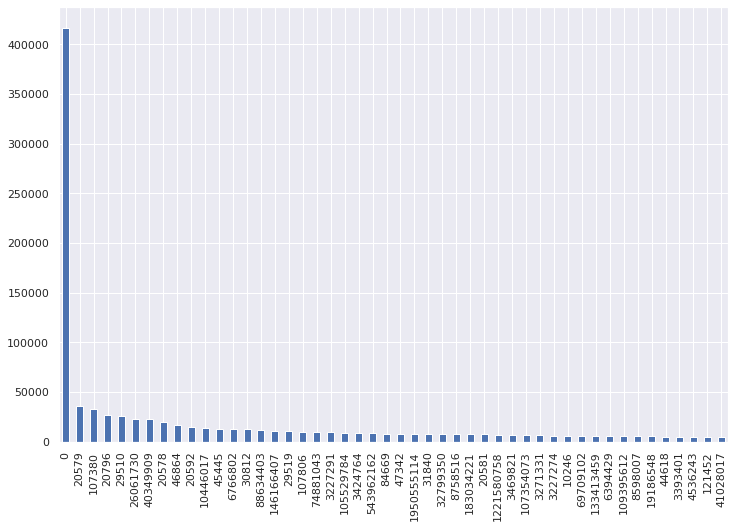

In [42]:
items["brand_id"].value_counts()[items["brand_id"].value_counts() > 5000].plot(kind='bar')

In [11]:
pd.DataFrame(items["brand_id"].value_counts()).to_csv(rootpath+'result_brand_id.csv')

In [40]:
items["brand_id"].value_counts()[items["brand_id"].value_counts() > 1000]

0            416803
20579         36066
107380        32866
20796         27223
29510         25579
              ...  
192808478      1006
87737749       1003
3619378        1003
81736815       1001
44610          1001
Name: brand_id, Length: 852, dtype: int64

In [22]:
items["brand_id"].value_counts().to_csv(rootpath+'brand_id.csv', sep='\t', header=None, index=False)

/root/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### 2.4 price价格的数量分布

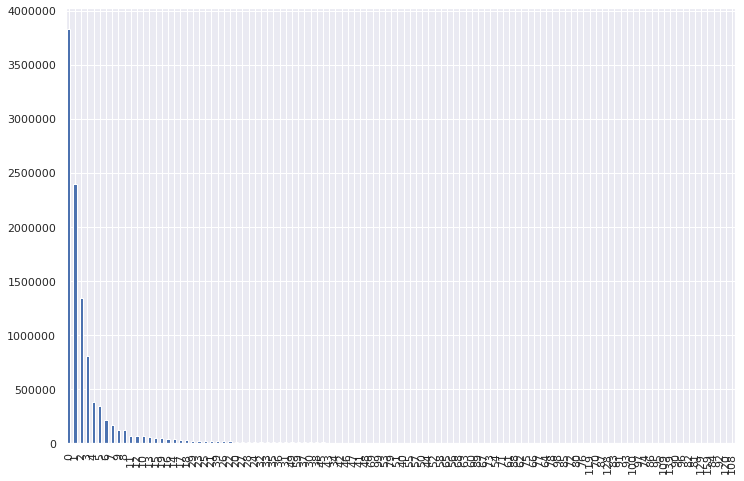

In [57]:
(items["price"] /100).astype(int).value_counts()[(items["price"] /100).astype(int).value_counts() > 1000].plot(kind='bar')

In [58]:
(items["price"] /100).astype(int).value_counts()[(items["price"] /100).astype(int).value_counts() > 1000]

0      3829598
1      2394893
2      1344301
3       807795
4       384887
        ...   
159       1095
84        1084
92        1061
120       1023
108       1009
Name: price, Length: 108, dtype: int64

## 3.找出一级商品与各个特征的关系

### 3.1 求出每个一级商品包含的子商品的种类

In [13]:
tmp = items.groupby("class1_id")["class_id"].nunique().to_frame().reset_index()

In [16]:
tmp.to_csv(rootpath+'result_cate1_id.csv', index=False)

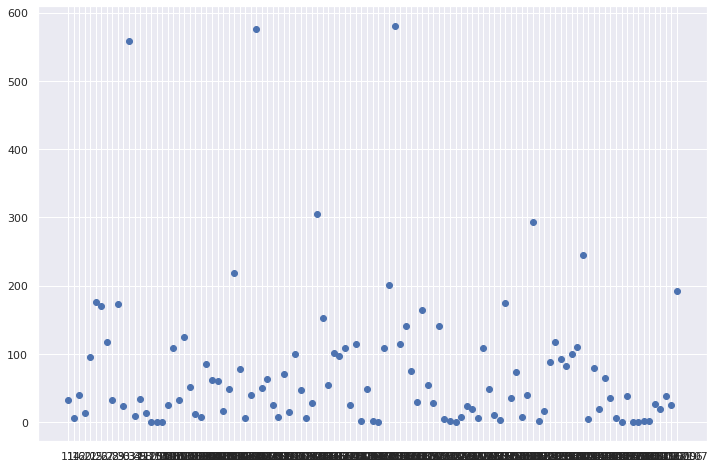

In [65]:
plt.scatter(tmp["class1_id"].astype(str), y =tmp["class_id"]) 

In [25]:
tmp.to_csv(rootpath+'cate_1_id+cate_id.csv', sep='\t', header=None, index=False)

### 3.2每个一级商品包含的品牌数

In [74]:
tmp1 = items.groupby("class1_id")["brand_id"].nunique().to_frame().reset_index()

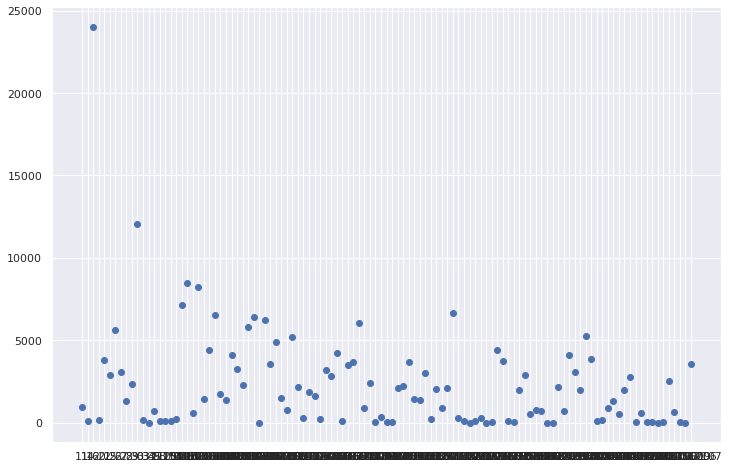

In [75]:
plt.scatter(tmp1["class1_id"].astype(str), y =tmp1["brand_id"]) 

In [70]:
tmp1

,class1_id,brand_id
0,11,974
1,14,95
2,16,23999
3,20,133
4,21,3770
...,...,...
106,126700003,2510
107,126762001,653
108,201149009,36
109,201156706,1


### 3.3求出每个一级商品售出商品的平均价格

In [77]:
tmp2 = items.groupby("class1_id")["price"].mean().to_frame().reset_index()

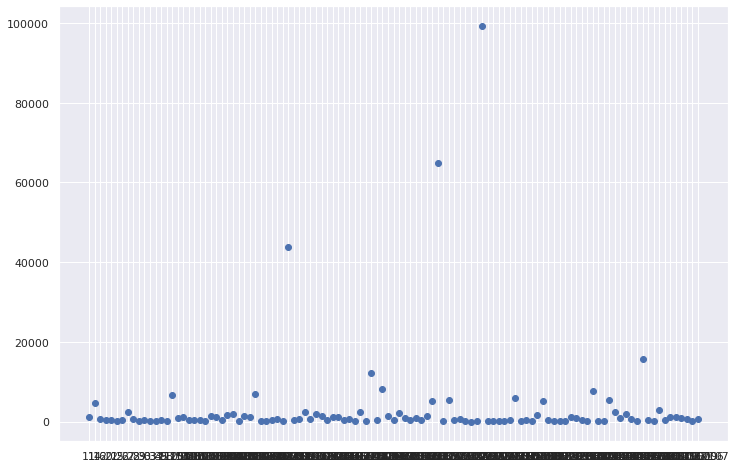

In [78]:
plt.scatter(tmp2["class1_id"].astype(str), y =tmp2["price"]) 

In [80]:
tmp2

,class1_id,price
0,11,1028.533366
1,14,4546.442912
2,16,555.304827
3,20,358.492501
4,21,337.354375
...,...,...
106,126700003,1105.412607
107,126762001,970.942891
108,201149009,584.786944
109,201156706,169.301422


In [81]:
gc.collect()

27007

In [18]:
53842+165255+197468+174521+159143

750229

In [23]:
m =[106556
,54080
,23509
,11117
,5351

]

In [26]:
sum = 0
for i in m:
    sum += i
sum

5590

In [25]:
m = [
    2685,
1376,
800
,
    384,
197,
98,
50

]

## 构建地域信息分布

34个省、自治区、直辖市和特别行政区

In [29]:
import numpy as np

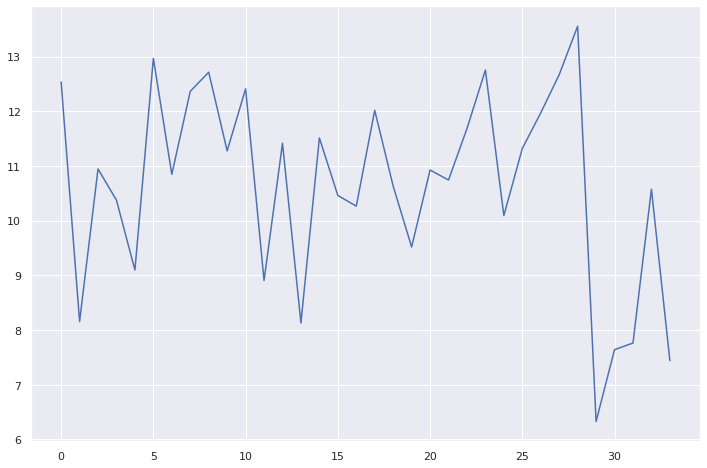

In [45]:
plt.plot(np.arange(34),list(np.random.normal(loc = 10,scale = 2,size = 34)))

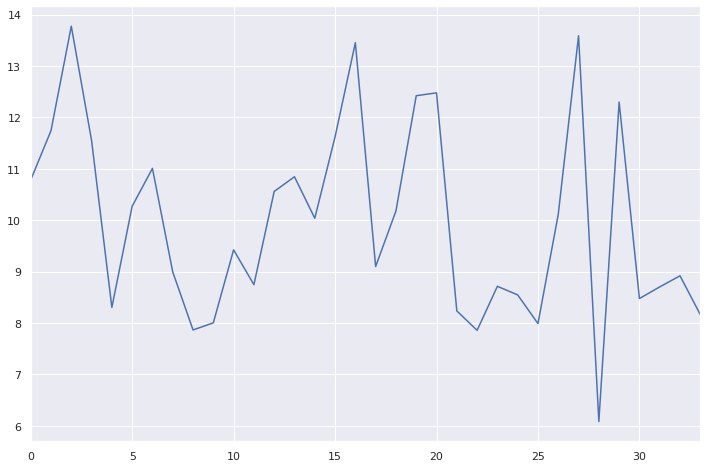

In [51]:
pd.DataFrame({"k":list(np.random.normal(loc = 10,scale = 2,size = 34))})["k"].plot()

In [55]:
w = (np.random.normal(loc = 10,scale = 2,size = 34))

In [58]:
w = w / (34 * 10)

In [60]:
v = w * 987791

In [63]:
v.astype(int)

array([ 8094,  9243, 10891,  8447,  7810,  8019,  7045,  8543,  9058,
        8328, 11103,  6478,  6410,  8441,  3869,  8816,  8562,  9757,
        9122, 11324, 11013,  7824,  5081,  7874,  7495,  9247,  6151,
        9459,  4992,  9849,  8212,  9201,  9426,  5576])

In [98]:
 w = np.random.normal(34)

In [99]:
w.sort()

AttributeError: 'float' object has no attribute 'sort'

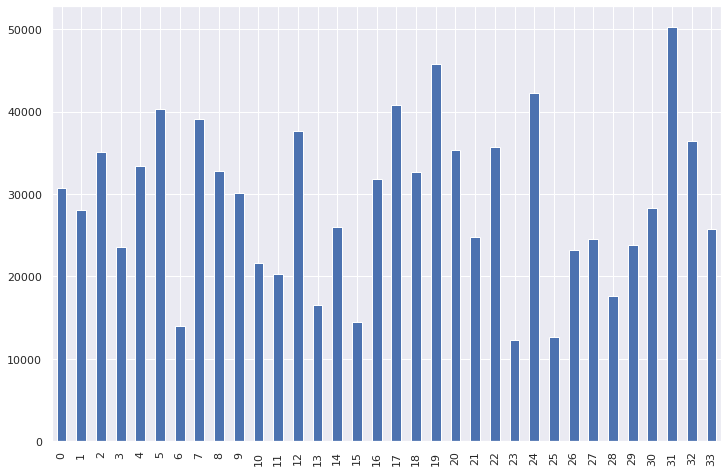

In [176]:
pd.DataFrame({'m':(ans ).astype(int)})['m'].sort_index().plot(kind='bar')

In [91]:
(w*10).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 4, 5, 5, 5, 6, 6, 6, 7,
       7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9])

In [96]:
help(value_counts)

NameError: name 'value_counts' is not defined

In [169]:
w = np.random.normal(loc=29039,scale=10000,size = 34)

In [170]:
k = w/w.sum()

In [171]:
ans = k * 987791

In [172]:
ans = ans.astype(int)

In [173]:
ans.sum()

987774

In [184]:
sorted(ans,reverse=True)

[50246,
 45734,
 42243,
 40843,
 40339,
 39072,
 37696,
 36375,
 35707,
 35282,
 35109,
 33429,
 32805,
 32610,
 31839,
 30700,
 30173,
 28332,
 28094,
 25948,
 25711,
 24821,
 24567,
 23866,
 23624,
 23199,
 21633,
 20240,
 17583,
 16533,
 14466,
 14023,
 12666,
 12266]

In [180]:
ans

array([12266, 12666, 14023, 14466, 16533, 17583, 20240, 21633, 23199,
       23624, 23866, 24567, 24821, 25711, 25948, 28094, 28332, 30173,
       30700, 31839, 32610, 32805, 33429, 35109, 35282, 35707, 36375,
       37696, 39072, 40339, 40843, 42243, 45734, 50246])

In [4]:
items

,item_id,class1_id,class_id,brand_id,price
0,43152,50022703,50003881,30652,1749.00
1,133107,11,110502,26683,189.98
2,138801,50010788,50010815,20067,538.50
3,140174,50010788,50010815,20112,814.00
4,237779,1801,50011980,20000,39.00
...,...,...,...,...,...
10786743,1092161303,16,162103,34647955,399.00
10786744,1092199911,50022517,50026441,35635958,498.00
10786745,1092233451,50008165,50010531,109043,249.00
10786746,1092243737,50008164,50001412,11178431,399.00


In [7]:
items["price"].isnull().value_counts()

False    10786748
Name: price, dtype: int64